In [68]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import normalize

In [69]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [70]:
x_train = normalize(x_train,axis=1)
x_test = normalize(x_test, axis=1)
np.shape(x_train[0])

(28, 28)

In [71]:
model = Sequential([
    Flatten(), #(28,28) -> (784,)
    Dense(units = 128, activation = 'relu'),
    Dense(units = 128, activation = 'relu'),
    Dense(units = 10, activation = 'softmax'),
])

In [72]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
                loss = SparseCategoricalCrossentropy(),
              metrics = ['accuracy']
             )

In [73]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.8680 - loss: 0.4610
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.9656 - loss: 0.1091
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.9786 - loss: 0.0695
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - accuracy: 0.9838 - loss: 0.0512
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 843us/step - accuracy: 0.9865 - loss: 0.0393
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 840us/step - accuracy: 0.9901 - loss: 0.0292
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.9927 - loss: 0.0214
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - accuracy: 0.9932 - loss: 0.0202
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.9950 - loss: 0.0153
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.9951 - loss: 0.0145


In [83]:
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)
predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9742 - loss: 0.1245
test loss, test acc: [0.11248381435871124, 0.9768000245094299]
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


In [98]:
i = np.random.randint(len(x_test))
random_image = x_test[i]
random_label = y_test[i]

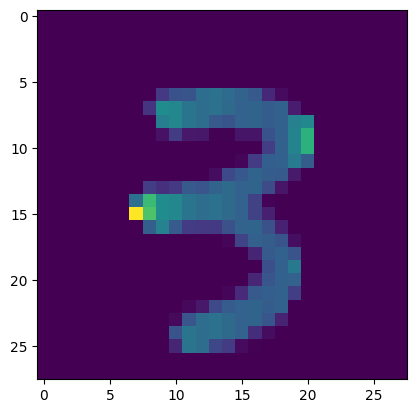

Label: 3
predicted value:3


In [99]:
plt.imshow(random_image)
plt.show()
print("Label:", random_label)
real_value = np.sum(np.arange(10)*predict[i])
print(f"predicted value:{round(real_value)}")
